<a href="https://colab.research.google.com/github/akkondaveeti4710-jpg/MRI-Tumor-Detection-AI/blob/main/MRI_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (4).json


{'kaggle (4).json': b'{"username":"akshayakondaveeti10","key":"5a99b2b921b56dd8a7dffc42cfa954b0"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection
!unzip brain-mri-images-for-brain-tumor-detection.zip


Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors
brain-mri-images-for-brain-tumor-detection.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  brain-mri-images-for-brain-tumor-detection.zip
replace brain_tumor_dataset/no/1 no.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!pip install tensorflow


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# 1. Data Preparation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.15,
    horizontal_flip=True
)

train = datagen.flow_from_directory(
    "brain_tumor_dataset",
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

val = datagen.flow_from_directory(
    "brain_tumor_dataset",
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

# 2. Model Definition
base = MobileNetV2(input_shape=(224,224,3), include_top=False, weights="imagenet")
base.trainable = False

x = base.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
preds = Dense(2, activation="softmax")(x)

model = Model(inputs=base.input, outputs=preds)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# 3. Training with Callbacks
early = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(patience=3, factor=0.3)

history = model.fit(
    train,
    validation_data=val,
    epochs=30,
    callbacks=[early, reduce_lr]
)

Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.5766 - loss: 0.7878 - val_accuracy: 0.7000 - val_loss: 0.4389 - learning_rate: 0.0010
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.7920 - loss: 0.4074 - val_accuracy: 0.8800 - val_loss: 0.2615 - learning_rate: 0.0010
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.8633 - loss: 0.3595 - val_accuracy: 0.9200 - val_loss: 0.2288 - learning_rate: 0.0010
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.8707 - loss: 0.3349 - val_accuracy: 0.9000 - val_loss: 0.2363 - learning_rate: 0.0010
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.8950 - loss: 0.2653 - val_accuracy: 0.9200 - val_loss: 0.2021 - learning_rate: 0.0010
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.9325 - loss: 0.1798 - val_accuracy: 0.9400 - val_loss: 0.1498 - learning_rate: 0.0010
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.9138 - loss: 0.2008 - val_accuracy: 0.9400 - val_l

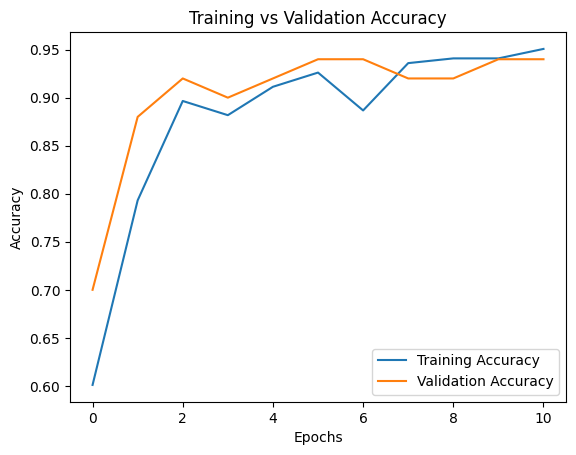

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


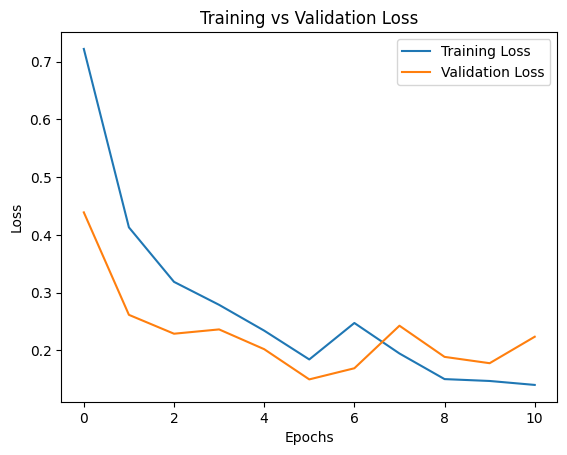

In [ ]:
import matplotlib.pyplot as plt

# Get loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot
plt.figure()
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')

plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
model.save("mri_model.h5")


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

val.reset()
preds = model.predict(val)
pred_labels = np.argmax(preds, axis=1)

true_labels = val.classes

print(confusion_matrix(true_labels, pred_labels))
print(classification_report(true_labels, pred_labels))


2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 7s/step
[[ 7 12]
 [12 19]]
              precision    recall  f1-score   support

           0       0.37      0.37      0.37        19
           1       0.61      0.61      0.61        31

    accuracy                           0.52        50
   macro avg       0.49      0.49      0.49        50
weighted avg       0.52      0.52      0.52        50



In [ ]:
base.trainable = True

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history_fine = model.fit(train, validation_data=val, epochs=5)


Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 96s 7s/step - accuracy: 0.6261 - loss: 1.1723 - val_accuracy: 0.9400 - val_loss: 0.1894
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 49s 7s/step - accuracy: 0.6890 - loss: 0.8831 - val_accuracy: 0.9600 - val_loss: 0.1889
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 48s 7s/step - accuracy: 0.7146 - loss: 0.6586 - val_accuracy: 0.8600 - val_loss: 0.2841
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 48s 7s/step - accuracy: 0.7679 - loss: 0.5348 - val_accuracy: 0.9000 - val_loss: 0.2483
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 45s 6s/step - accuracy: 0.7505 - loss: 0.5248 - val_accuracy: 0.8800 - val_loss: 0.2959


In [ ]:
base.trainable = True

# Freeze first layers, train deeper ones
for layer in base.layers[:100]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history_fine = model.fit(
    train,
    validation_data=val,
    epochs=5
)


Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 47s 5s/step - accuracy: 0.8108 - loss: 0.4006 - val_accuracy: 0.8800 - val_loss: 0.3657
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.8582 - loss: 0.3098 - val_accuracy: 0.8600 - val_loss: 0.3500
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.8817 - loss: 0.2931 - val_accuracy: 0.8800 - val_loss: 0.2971
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.9029 - loss: 0.2650 - val_accuracy: 0.8600 - val_loss: 0.4625
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.9004 - loss: 0.2331 - val_accuracy: 0.8600 - val_loss: 0.4300


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

val.reset()
preds = model.predict(val)
pred_labels = np.argmax(preds, axis=1)

true_labels = val.classes

print(confusion_matrix(true_labels, pred_labels))
print(classification_report(true_labels, pred_labels))


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


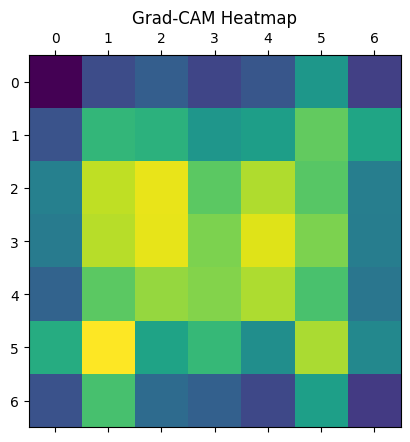

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Prepare the image
img_path = val.filepaths[0]
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224,224))
img_array = tf.keras.preprocessing.image.img_to_array(img)/255.0
img_array = np.expand_dims(img_array, axis=0)

# Create a model that outputs both the last conv layer and the predictions
grad_model = tf.keras.models.Model(
    [model.inputs],
    [model.get_layer("Conv_1").output, model.output]
)

# Record gradients
with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(img_array)
    loss = predictions[:, np.argmax(predictions[0])]

# Compute gradients of the loss w.r.t. the conv layer output
grads = tape.gradient(loss, conv_outputs)

# Pool the gradients across channels (Importance weights)
weights = tf.reduce_mean(grads, axis=(0, 1, 2))

# Compute the weighted sum of feature maps to get the 2D heatmap
heatmap = tf.reduce_sum(tf.multiply(weights, conv_outputs[0]), axis=-1)

# Apply ReLU to the heatmap and normalize it for visualization
heatmap = np.maximum(heatmap, 0)
if np.max(heatmap) != 0:
    heatmap /= np.max(heatmap)

# Plot the 2D heatmap
plt.matshow(heatmap)
plt.title("Grad-CAM Heatmap")
plt.show()

In [ ]:
model.save("mri_model.h5")


In [ ]:
!pip install tensorflowjs
!tensorflowjs_converter --input_format keras mri_model.h5 tfjs_model


2026-02-16 17:39:19.116570: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1771263559.144561   17607 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1771263559.151366   17607 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1771263559.169065   17607 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771263559.169157   17607 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771263559.169162   17607 computation_placer.cc:177] computation placer alr

In [ ]:
model.save("mri_model.h5")


In [ ]:
model.save("/content/mri_model_final.h5")


In [ ]:
from google.colab import files
files.download("/content/mri_model_final.h5")


In [ ]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

# Pick a validation image
img_path = val.filepaths[0]

# Load image
img = cv2.imread(img_path)
img = cv2.resize(img,(224,224))
img = img / 255.0

img_array = np.expand_dims(img, axis=0)

# Create grad model
last_conv_layer = model.get_layer("Conv_1")

grad_model = tf.keras.models.Model(
    [model.inputs],
    [last_conv_layer.output, model.output]
)

# Compute gradients
with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(img_array)
    class_idx = np.argmax(predictions[0])
    loss = predictions[:, class_idx]

grads = tape.gradient(loss, conv_outputs)

# Build heatmap
heatmap = tf.reduce_mean(grads, axis=(0,1))
heatmap = np.maximum(heatmap, 0)
heatmap /= tf.math.reduce_max(heatmap)

# Show heatmap
plt.imshow(heatmap)
plt.colorbar()
plt.show()


Using layer: Conv_1


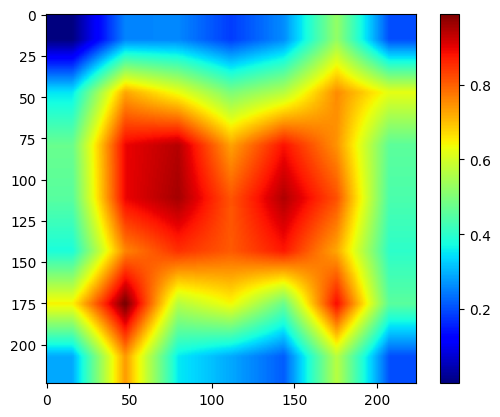

In [ ]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

# Select image
img_path = val.filepaths[0]

img = cv2.imread(img_path)
img = cv2.resize(img,(224,224))
img = img/255.0
img_array = np.expand_dims(img, axis=0)

# Find last conv layer automatically
last_conv_layer = None
for layer in reversed(model.layers):
    if isinstance(layer, tf.keras.layers.Conv2D):
        last_conv_layer = layer.name
        break

print("Using layer:", last_conv_layer)

grad_model = tf.keras.models.Model(
    inputs=model.inputs,
    outputs=[model.get_layer(last_conv_layer).output, model.output]
)

# Gradient tape
with tf.GradientTape() as tape:
    # Pass input as a list to avoid the structure mismatch warning
    conv_outputs, predictions = grad_model([img_array])
    class_idx = np.argmax(predictions[0])
    loss = predictions[:, class_idx]

grads = tape.gradient(loss, conv_outputs)

# Build heatmap
pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
conv_outputs = conv_outputs[0]

heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
heatmap = tf.squeeze(heatmap)

# Apply ReLU and normalize
heatmap = np.maximum(heatmap, 0) / np.max(heatmap)

# Resize heatmap
heatmap = cv2.resize(heatmap, (224,224))

plt.imshow(heatmap, cmap="jet")
plt.colorbar()
plt.show()

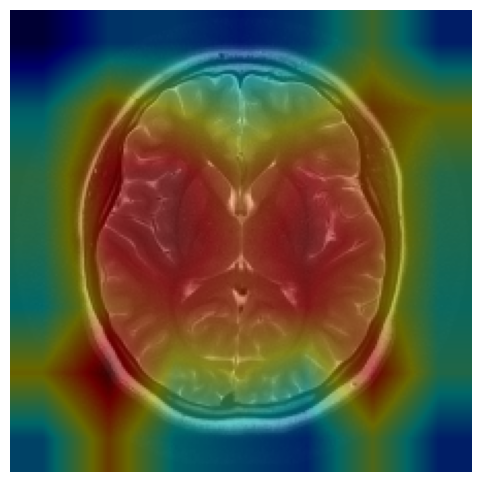

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Reload original image
img = cv2.imread(img_path)
img = cv2.resize(img,(224,224))

# Convert heatmap to color
heatmap_color = cv2.applyColorMap(
    np.uint8(255*heatmap),
    cv2.COLORMAP_JET
)

# Overlay
overlay = cv2.addWeighted(img, 0.6, heatmap_color, 0.4, 0)

# Show
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


In [ ]:
img_path = val.filepaths[5]


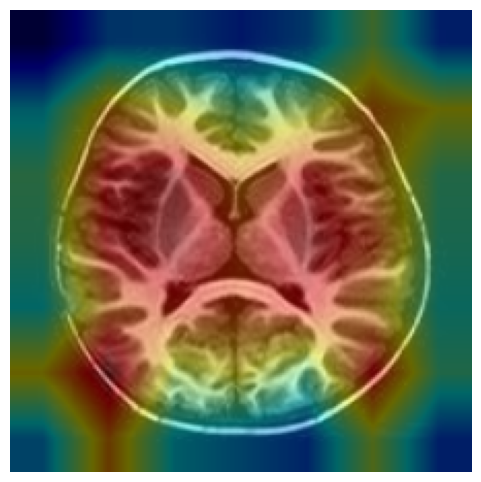

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Reload original image
img = cv2.imread(img_path)
img = cv2.resize(img,(224,224))

# Convert heatmap to color
heatmap_color = cv2.applyColorMap(
    np.uint8(255*heatmap),
    cv2.COLORMAP_JET
)

# Overlay
overlay = cv2.addWeighted(img, 0.6, heatmap_color, 0.4, 0)

# Show
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


In [ ]:
img_path = val.filepaths[10]

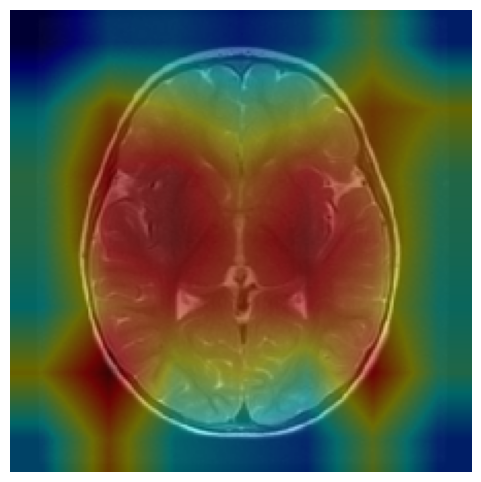

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Reload original image
img = cv2.imread(img_path)
img = cv2.resize(img,(224,224))

# Convert heatmap to color
heatmap_color = cv2.applyColorMap(
    np.uint8(255*heatmap),
    cv2.COLORMAP_JET
)

# Overlay
overlay = cv2.addWeighted(img, 0.6, heatmap_color, 0.4, 0)

# Show
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [ ]:
img_path = val.filepaths[15]

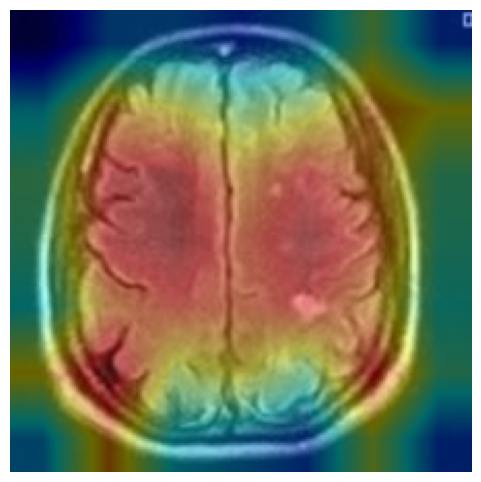

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Reload original image
img = cv2.imread(img_path)
img = cv2.resize(img,(224,224))

# Convert heatmap to color
heatmap_color = cv2.applyColorMap(
    np.uint8(255*heatmap),
    cv2.COLORMAP_JET
)

# Overlay
overlay = cv2.addWeighted(img, 0.6, heatmap_color, 0.4, 0)

# Show
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [ ]:
img_path = val.filepaths[20]

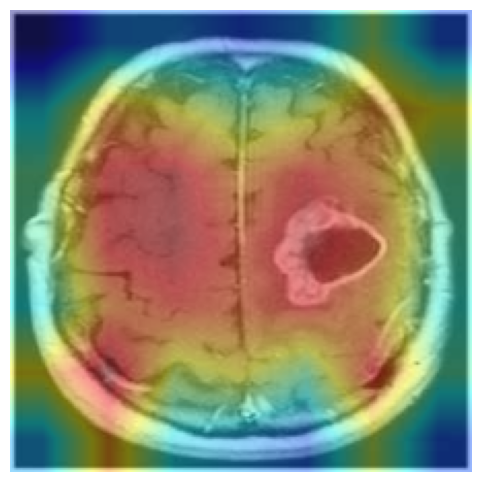

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Reload original image
img = cv2.imread(img_path)
img = cv2.resize(img,(224,224))

# Convert heatmap to color
heatmap_color = cv2.applyColorMap(
    np.uint8(255*heatmap),
    cv2.COLORMAP_JET
)

# Overlay
overlay = cv2.addWeighted(img, 0.6, heatmap_color, 0.4, 0)

# Show
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [ ]:
img_path = val.filepaths[25]

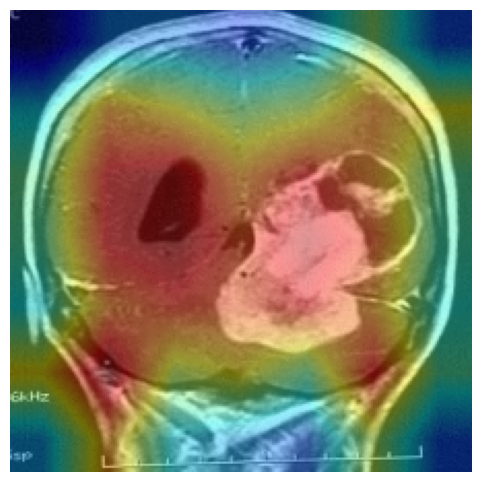

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Reload original image
img = cv2.imread(img_path)
img = cv2.resize(img,(224,224))

# Convert heatmap to color
heatmap_color = cv2.applyColorMap(
    np.uint8(255*heatmap),
    cv2.COLORMAP_JET
)

# Overlay
overlay = cv2.addWeighted(img, 0.6, heatmap_color, 0.4, 0)

# Show
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

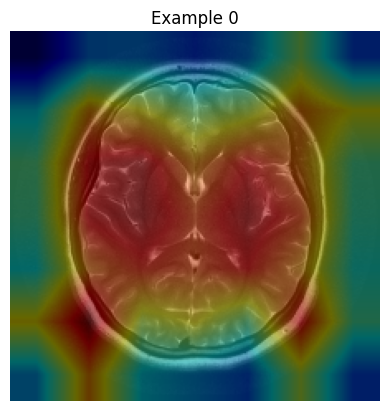

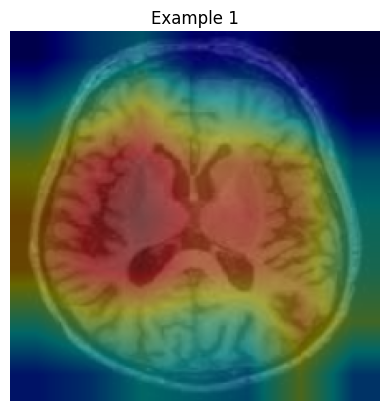

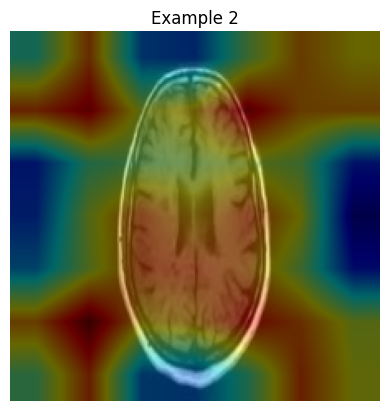

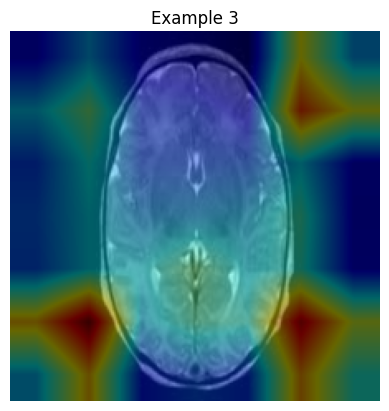

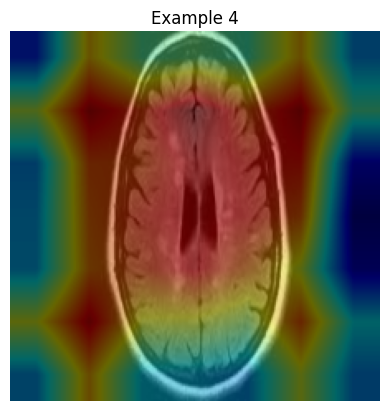

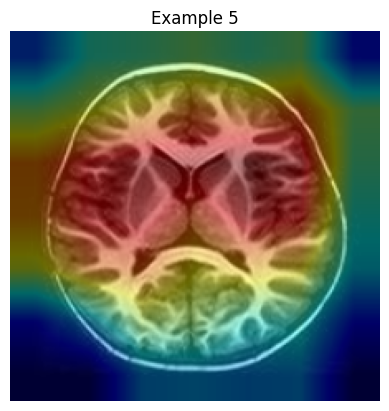

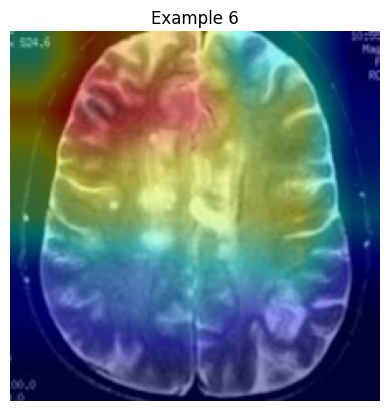

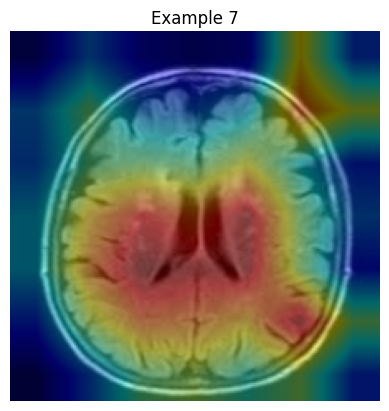

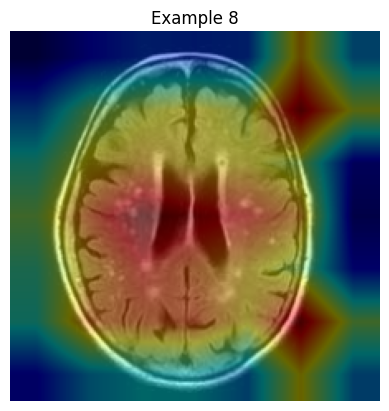

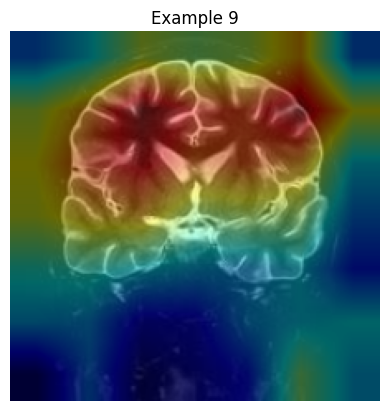

In [ ]:
for i in range(10):
    img_path = val.filepaths[i]

    img = cv2.imread(img_path)
    img = cv2.resize(img,(224,224))
    img_norm = img/255.0
    img_array = np.expand_dims(img_norm, axis=0)

    with tf.GradientTape() as tape:
        # Pass input as a list to avoid the structure mismatch warning
        conv_outputs, predictions = grad_model([img_array])
        class_idx = np.argmax(predictions[0])
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    conv_outputs = conv_outputs[0]

    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Apply ReLU and normalize
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)

    # Resize heatmap
    heatmap = cv2.resize(heatmap, (224,224))

    heatmap_color = cv2.applyColorMap(
        np.uint8(255*heatmap),
        cv2.COLORMAP_JET
    )

    overlay = cv2.addWeighted(img, 0.6, heatmap_color, 0.4, 0)

    # Save the image to the local directory
    cv2.imwrite(f"gradcam_{i}.png", overlay)

    plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    plt.title(f"Example {i}")
    plt.axis("off")
    plt.show()

In [ ]:
cv2.imwrite(f"gradcam_{i}.png", overlay)


In [ ]:
from google.colab import files
files.download("gradcam_9.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
for i in range(10):
    ...
    cv2.imwrite(f"/content/gradcam_{i}.png", overlay)


In [ ]:
!zip -r gradcams.zip gradcam_*.png
from google.colab import files
files.download("gradcams.zip")

  adding: gradcam_0.png (deflated 6%)
  adding: gradcam_1.png (deflated 6%)
  adding: gradcam_2.png (deflated 6%)
  adding: gradcam_3.png (deflated 6%)
  adding: gradcam_4.png (deflated 6%)
  adding: gradcam_5.png (deflated 6%)
  adding: gradcam_6.png (deflated 6%)
  adding: gradcam_7.png (deflated 6%)
  adding: gradcam_8.png (deflated 6%)
  adding: gradcam_9.png (deflated 6%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('mri_model_final.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model('mri_model_final.h5')

for layer in reversed(model.layers):
    try:
        # Accessing shape via the output tensor
        shape = layer.output.shape
        if len(shape) == 4: # Look for the last 4D layer (typically Conv2D)
            print(f"Found 4D layer: {layer.name} with shape {shape}")
            break
    except (AttributeError, RuntimeError):
        # Skip layers that don't have an output tensor (like Input layers in some contexts)
        continue

Found 4D layer: out_relu with shape (None, 7, 7, 1280)
